In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from pmdarima.arima.utils import ndiffs

In [2]:
df = pd.read_csv('D:\ML1BootCamp\Day15_Stock_data_prediction\stock.csv')
df.head(2)

,last_price,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f153,f154,f155,f156,f157,f158,f159,f160,f161,time
0,43138.2,0.000463,15139,-43.1,43.0,-0.1,-4.8,-5.1,-4.3,-15.2,...,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2,12:47:41.916971
1,43138.2,0.000463,15140,-43.1,43.0,-0.1,-4.7,-5.1,-2.4,-15.2,...,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2,12:47:40.693372


In [3]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.last_price)
print(f"ADF Statistic : {result[0]}")
print(f"p-Value : {result[1]}")

ADF Statistic : -0.8152004953880547
p-Value : 0.8146162096879981


- Not Stationary

### Checking the number of differences needed for stationarity

In [11]:
diff = df['last_price'].diff().dropna()
d_value = ndiffs(diff)
d_value

0

# Fitting an ARIMA model

In [14]:
model = auto_arima(df['last_price'], d=d_value, suppress_warnings=True)

print(model.summary())

#  predicting the next 15 steps
forecast, conf_int = model.predict(n_periods=15, return_conf_int=True)
print("Forecast:", forecast)
print("Confidence Interval:", conf_int)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 9979
Model:               SARIMAX(1, 0, 1)   Log Likelihood              -25812.135
Date:                Wed, 10 Jan 2024   AIC                          51632.270
Time:                        12:16:00   BIC                          51661.103
Sample:                             0   HQIC                         51642.031
                               - 9979                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.9354      7.910      0.750      0.453      -9.568      21.439
ar.L1          0.9999      0.000   5432.893      0.000       1.000       1.000
ma.L1          0.0372      0.005      7.985      0.0

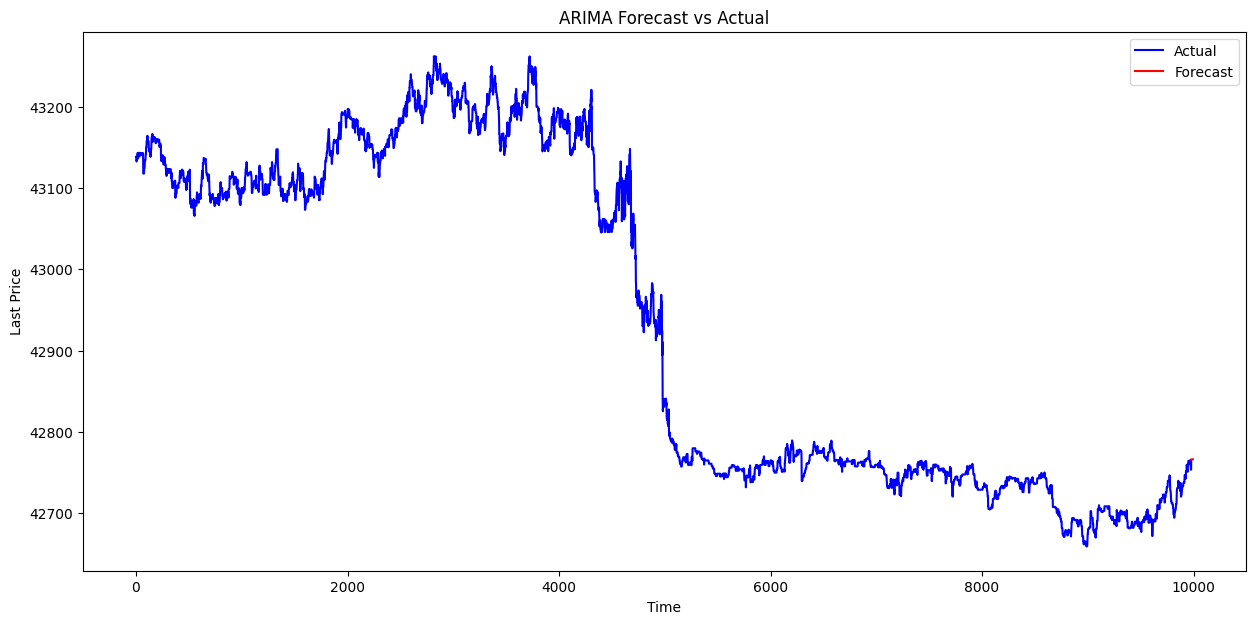

In [20]:
plt.figure(figsize=(15, 7))

# Plot the actual values
plt.plot(df['last_price'], label='Actual', color='blue')

# Plot the predicted values
plt.plot(range(len(df), len(df) + 15), forecast, label='Forecast', color='red')


plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Last Price')
plt.legend()
plt.show()


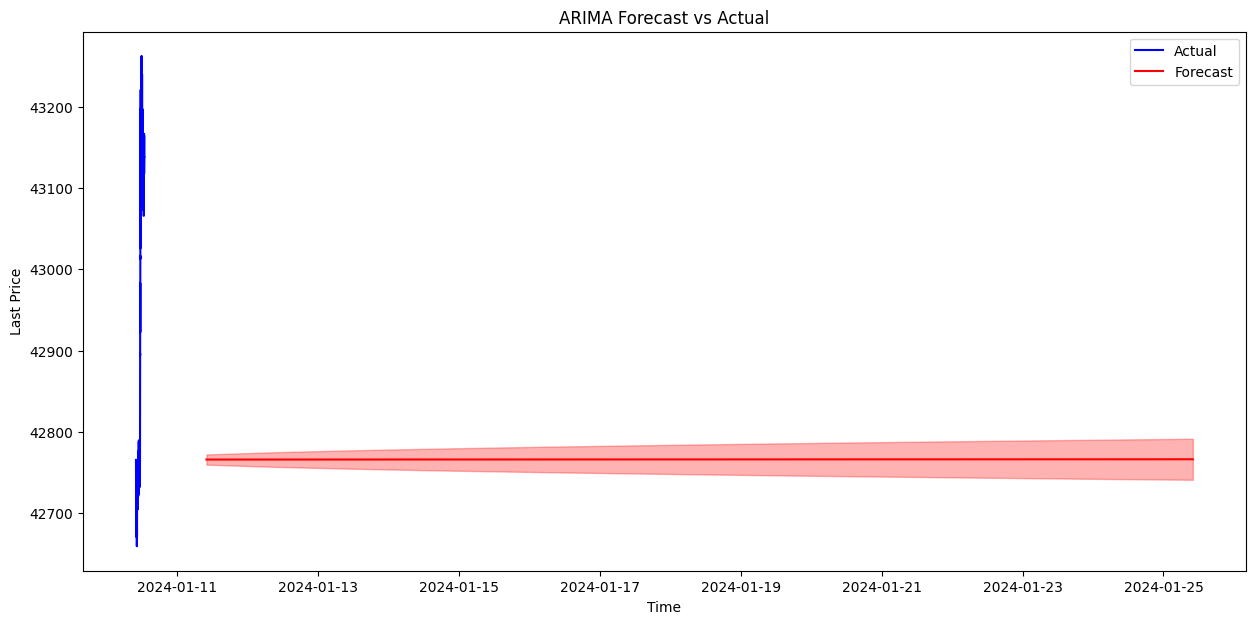

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame with a 'time' column and a 'last_price' column
# Replace 'df' with your actual DataFrame name

# Convert the 'time' column to datetime type
df['time'] = pd.to_datetime(df['time'])

# Set the figure size
plt.figure(figsize=(15, 7))

# Plot the actual values
plt.plot(df['time'], df['last_price'], label='Actual', color='blue')

# Plot the predicted values
forecast_index = pd.date_range(start=df['time'].iloc[-1], periods=16, freq='D')[1:]
plt.plot(forecast_index, forecast, label='Forecast', color='red')

# Plot confidence interval if available
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='red', alpha=0.3)

# Customize the plot
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Last Price')
plt.legend()
plt.show()
